In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\jayan\Downloads\World_development_mesurement.xlsx")
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [3]:
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [4]:
data['Country'].nunique()

208

In [5]:
data['Tourism Inbound']

0           $102,000,000
1            $34,000,000
2            $77,000,000
3           $227,000,000
4            $23,000,000
              ...       
2699                 NaN
2700    $200,092,000,000
2701      $2,222,000,000
2702        $904,000,000
2703                 NaN
Name: Tourism Inbound, Length: 2704, dtype: object

In [6]:
data.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [7]:
data['Business Tax Rate']=data['Business Tax Rate'].str.replace('%','',regex=False).str.strip()
data['Business Tax Rate']=pd.to_numeric(data['Business Tax Rate'],errors='coerce')
data['Business Tax Rate']=data['Business Tax Rate']/100

In [8]:
data['Business Tax Rate'].dtypes

dtype('float64')

In [9]:
countries=data['Country']

In [10]:
data.drop('Country',axis=1,inplace=True)

In [11]:
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,0.464,NaN,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",175.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,0.419,NaN,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",310.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,0.619,NaN,144.0,180.0,NaN,"$381,286,223,859",0.046,$593,792.0,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [12]:
data['Health Exp/Capita']=data['Health Exp/Capita'].str.replace('$','',regex=False).str.replace(',','',regex=False).str.strip()
data['Health Exp/Capita']

0         60
1         22
2         15
3        152
4         12
        ... 
2699     NaN
2700    8895
2701    1308
2702     593
2703     NaN
Name: Health Exp/Capita, Length: 2704, dtype: object

In [13]:
data['Health Exp/Capita']=pd.to_numeric(data['Health Exp/Capita'],errors='coerce')

In [14]:
data['Health Exp/Capita'].dtypes

dtype('float64')

In [15]:
data['GDP']=data['GDP'].str.replace('$','',regex=False).str.replace(',','',regex=False).str.strip()
data['GDP']

0          54790058957
1           9129594819
2           2359122303
3           5788311645
4           2610959139
             ...      
2699               NaN
2700    16244600000000
2701       50004354667
2702      381286223859
2703               NaN
Name: GDP, Length: 2704, dtype: object

In [16]:
data['GDP']=pd.to_numeric(data['GDP'],errors='coerce')

In [17]:
data['GDP'].dtypes

dtype('float64')

In [18]:
data.drop('Number of Records',axis=1,inplace=True)

In [19]:
data['Tourism Inbound']=data['Tourism Inbound'].str.replace('$','',regex=False).str.replace(',','',regex=False).str.strip()
data['Tourism Inbound']=pd.to_numeric(data['Tourism Inbound'],errors='coerce')

In [20]:
data['Tourism Inbound'].dtypes

dtype('float64')

In [21]:
data['Tourism Outbound']=data['Tourism Outbound'].str.replace('$','',regex=False).str.replace(',','',regex=False).str.strip()
data['Tourism Outbound']=pd.to_numeric(data['Tourism Outbound'],errors='coerce')

In [22]:
data.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [23]:
data.shape

(2704, 23)

In [24]:
cols1=data.columns[:12]
cols2=data.columns[12:]

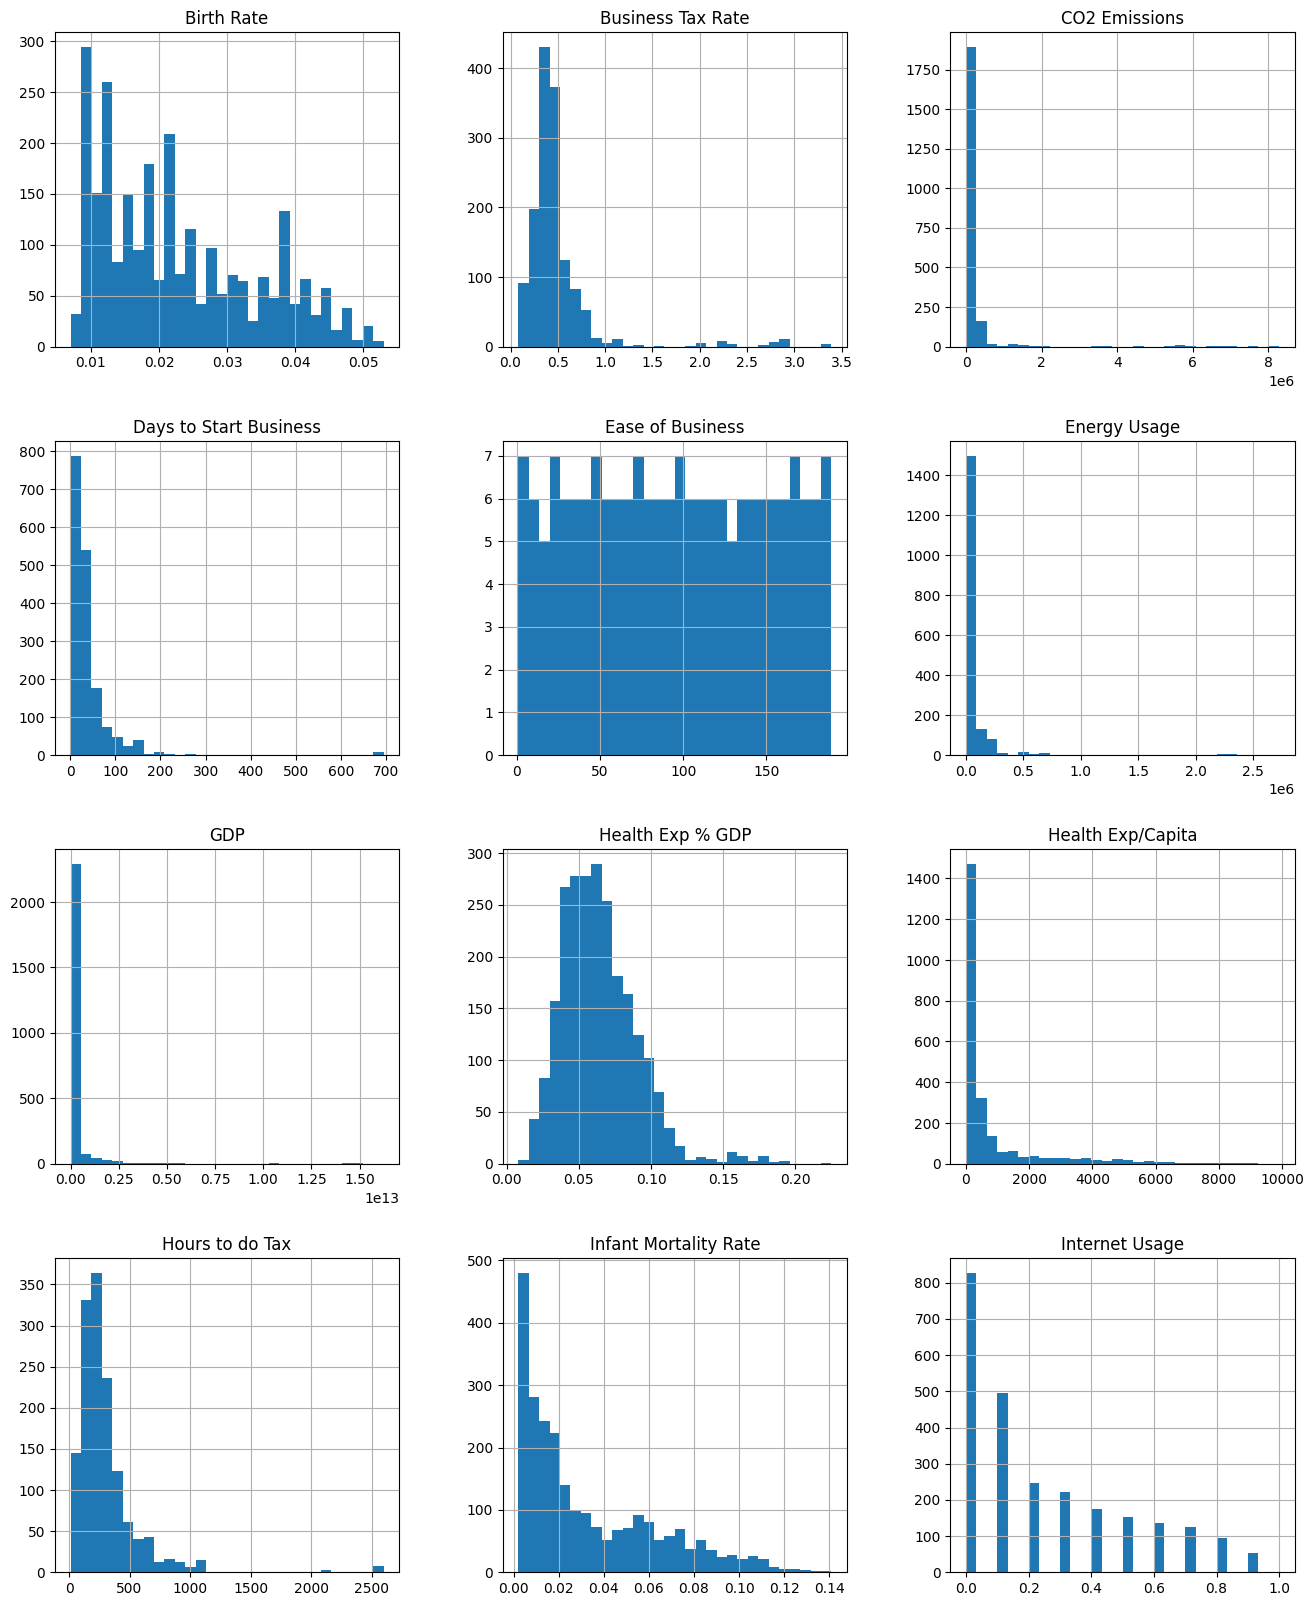

In [25]:
data[cols1].hist(figsize=(16,20),bins=30)
plt.show()

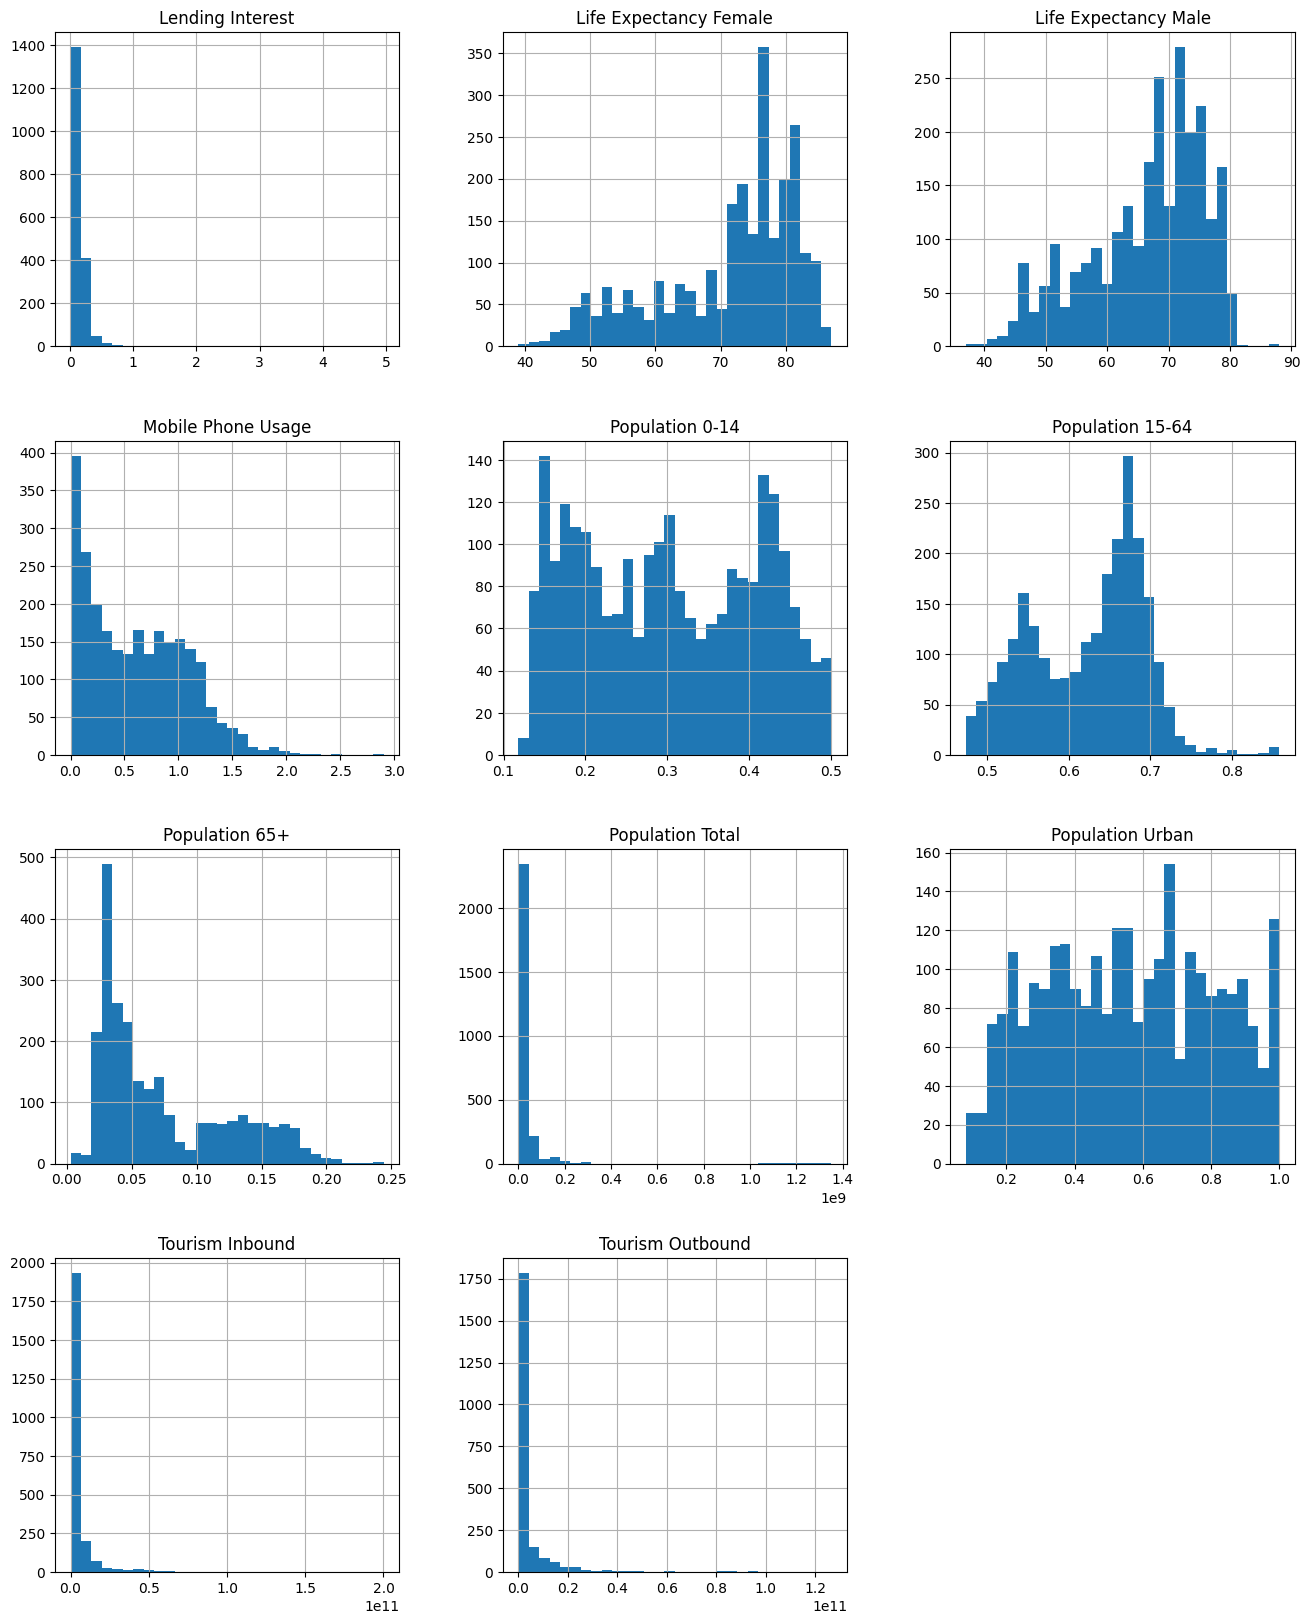

In [26]:
data[cols2].hist(figsize=(16,20),bins=30)
plt.show()

In [27]:
data.skew()

Birth Rate                 0.662151
Business Tax Rate          4.342568
CO2 Emissions              8.654039
Days to Start Business     7.437592
Ease of Business           0.017745
Energy Usage               7.062230
GDP                        9.424247
Health Exp % GDP           1.179757
Health Exp/Capita          2.817482
Hours to do Tax            4.491308
Infant Mortality Rate      1.049118
Internet Usage             0.940966
Lending Interest          15.536119
Life Expectancy Female    -0.891556
Life Expectancy Male      -0.705485
Mobile Phone Usage         0.569605
Population 0-14            0.059660
Population 15-64          -0.186881
Population 65+             0.919841
Population Total           8.788164
Population Urban           0.012519
Tourism Inbound            7.114871
Tourism Outbound           5.210304
dtype: float64

In [28]:
data.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [29]:
skewed_cols = data.skew()[(data.skew() >= 0.5) | (data.skew() <= -0.5)]
skewed_cols

Birth Rate                 0.662151
Business Tax Rate          4.342568
CO2 Emissions              8.654039
Days to Start Business     7.437592
Energy Usage               7.062230
GDP                        9.424247
Health Exp % GDP           1.179757
Health Exp/Capita          2.817482
Hours to do Tax            4.491308
Infant Mortality Rate      1.049118
Internet Usage             0.940966
Lending Interest          15.536119
Life Expectancy Female    -0.891556
Life Expectancy Male      -0.705485
Mobile Phone Usage         0.569605
Population 65+             0.919841
Population Total           8.788164
Tourism Inbound            7.114871
Tourism Outbound           5.210304
dtype: float64

In [30]:
median_cols = ['Birth Rate', 'Business Tax Rate', 'CO2 Emissions','Days to Start Business', 'Energy Usage', 'GDP','Health Exp % GDP', 'Health Exp/Capita','Hours to do Tax', 'Infant Mortality Rate','Lending Interest', 'Population Total','Tourism Inbound', 'Tourism Outbound','Internet Usage', 'Life Expectancy Female','Life Expectancy Male', 'Mobile Phone Usage','Population 65+']
mean_cols = ['Ease of Business','Population 0-14','Population 15-64','Population Urban']

In [31]:
for col in median_cols:
    data[col]=data[col].fillna(data[col].median())
for col in mean_cols:
    data[col]=data[col].fillna(data[col].mean())

In [32]:
data.isna().sum().sum()

0

In [33]:
log_cols = ['Business Tax Rate', 'CO2 Emissions', 'Days to Start Business','Energy Usage', 'GDP', 'Health Exp/Capita','Hours to do Tax', 'Lending Interest','Population Total', 'Tourism Inbound', 'Tourism Outbound']
for col in log_cols:
    data[col]=np.log1p(data[col])

In [34]:
yj_cols = ['Birth Rate', 'Health Exp % GDP', 'Infant Mortality Rate','Internet Usage', 'Mobile Phone Usage', 'Population 65+','Life Expectancy Female', 'Life Expectancy Male']
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[yj_cols]=pt.fit_transform(data[yj_cols])

In [35]:
data.skew()

Birth Rate                0.163011
Business Tax Rate         4.177742
CO2 Emissions             0.088705
Days to Start Business    0.171303
Ease of Business          0.067326
Energy Usage             -0.615506
GDP                       0.251343
Health Exp % GDP         -0.016459
Health Exp/Capita         0.209499
Hours to do Tax          -0.321487
Infant Mortality Rate     0.313312
Internet Usage            0.262361
Lending Interest          6.998601
Life Expectancy Female   -0.266381
Life Expectancy Male     -0.158946
Mobile Phone Usage        0.026539
Population 0-14           0.062242
Population 15-64         -0.194971
Population 65+            0.295910
Population Total         -0.371783
Population Urban          0.012579
Tourism Inbound          -0.273627
Tourism Outbound         -0.015155
dtype: float64

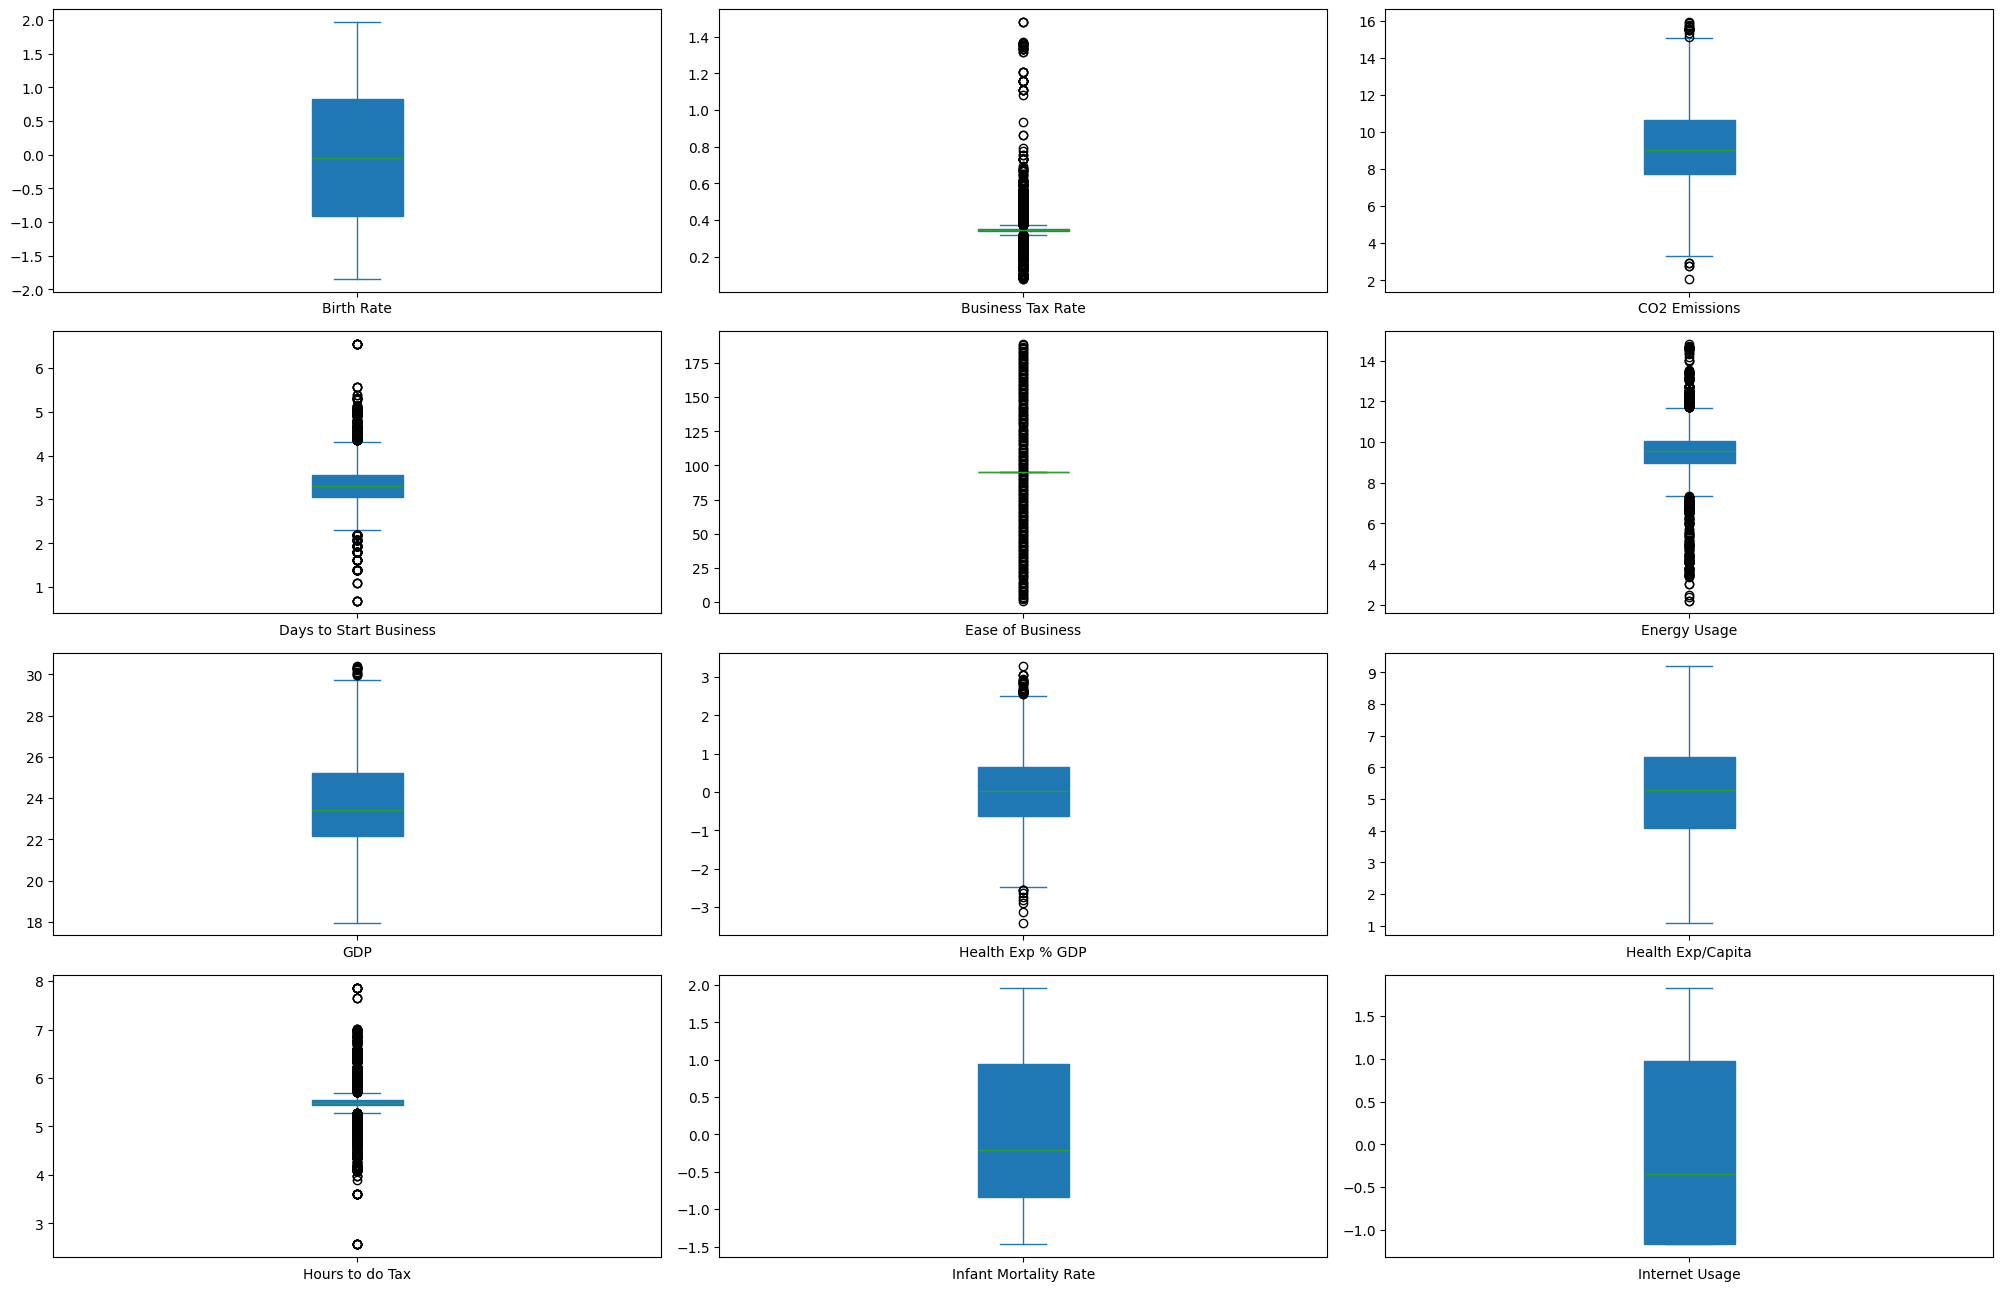

In [36]:
data[data.columns[:12]].plot(kind='box',figsize=(20,16),layout=(5,3),patch_artist=True,subplots=True)
plt.tight_layout()
plt.show()

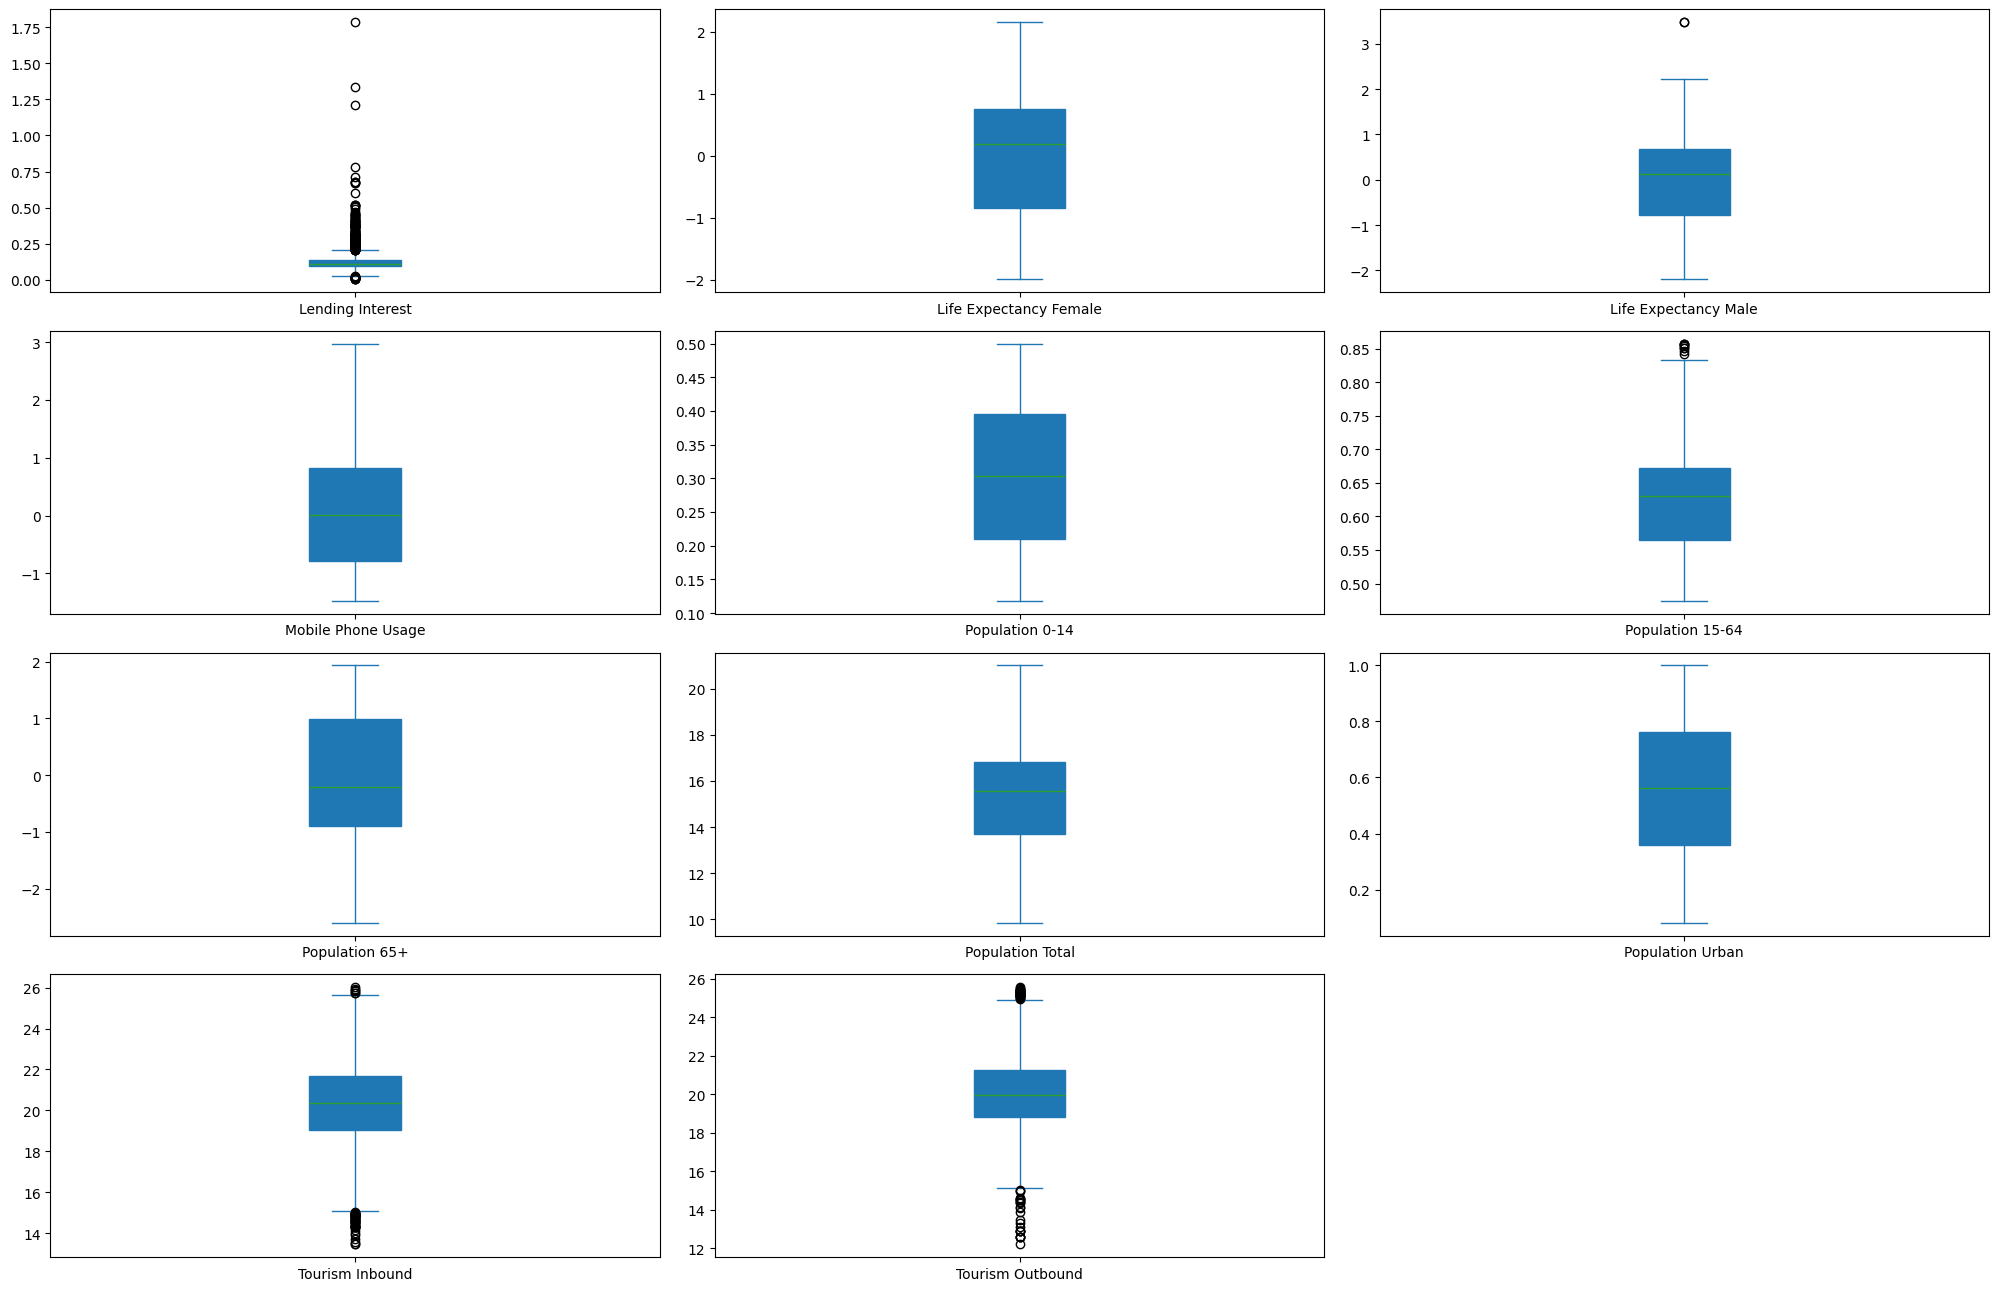

In [37]:
data[data.columns[12:]].plot(kind='box',figsize=(20,16),layout=(5,3),patch_artist=True,subplots=True)
plt.tight_layout()
plt.show()

In [38]:
upper=data['Lending Interest'].quantile(0.99)
data['Lending Interest']=data['Lending Interest'].clip(upper=upper)

In [39]:
data.skew()

Birth Rate                0.163011
Business Tax Rate         4.177742
CO2 Emissions             0.088705
Days to Start Business    0.171303
Ease of Business          0.067326
Energy Usage             -0.615506
GDP                       0.251343
Health Exp % GDP         -0.016459
Health Exp/Capita         0.209499
Hours to do Tax          -0.321487
Infant Mortality Rate     0.313312
Internet Usage            0.262361
Lending Interest          2.142491
Life Expectancy Female   -0.266381
Life Expectancy Male     -0.158946
Mobile Phone Usage        0.026539
Population 0-14           0.062242
Population 15-64         -0.194971
Population 65+            0.295910
Population Total         -0.371783
Population Urban          0.012579
Tourism Inbound          -0.273627
Tourism Outbound         -0.015155
dtype: float64

In [40]:
data1=data

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data = scaler.fit_transform(data)

In [42]:
data=pd.DataFrame(data,columns=scaler.get_feature_names_out())
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.000000,0.000000,0.792073,0.000000,0.000000,0.577820,0.416620,-1.105860,-0.517328,0.000000,...,-0.295402,-0.171885,-0.930711,0.210534,-0.111111,-0.249740,0.542387,0.088951,-0.719006,-0.350269
1,1.105201,0.000000,0.038100,0.000000,0.000000,-0.591757,-0.162052,-1.156099,-0.953454,0.000000,...,-1.251791,-1.423073,-0.930711,0.934859,-1.222222,-0.579739,0.279576,-0.589642,-1.132669,-0.463963
2,0.944453,0.000000,-0.564405,0.000000,0.000000,-1.805977,-0.599041,-0.726175,-1.115721,0.000000,...,-0.991177,-1.073248,-0.930711,0.815940,-1.055556,-0.478164,0.057698,-0.444053,-0.824875,-0.900508
3,0.376586,0.000000,-0.234378,0.000000,0.000000,-1.876268,-0.309202,-0.550303,-0.106159,0.000000,...,-1.140677,-1.247601,-0.703187,0.432156,-0.407407,-0.478164,-0.381561,-0.076379,-0.417788,-0.317823
4,1.018413,0.000000,-0.713807,0.000000,0.000000,0.000000,-0.566287,-0.383089,-1.208564,0.000000,...,-1.140677,-1.247601,-0.930711,0.891616,-1.166667,-0.502978,0.221478,-0.949914,-1.279844,-1.108609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.069616,0.000000,-1.655764,0.858846,0.000000,0.000000
2700,-0.489822,2.795914,0.000000,-2.904363,-90.875676,4.567329,2.254694,2.262531,1.710513,-2.849843,...,0.544808,0.701020,0.604251,-0.578655,0.333333,0.842216,1.274095,0.612085,2.135702,2.291970
2701,-0.336450,0.473344,0.000000,-2.348851,-9.875676,0.000000,0.387105,0.851376,0.853652,2.381223,...,0.444808,0.484224,1.043294,-0.448925,0.074074,0.862462,-0.170962,0.950148,0.441164,0.331152
2702,0.000000,10.282609,0.000000,3.245800,85.124324,0.000000,1.043102,-0.593441,0.500353,10.981889,...,0.256143,0.280881,0.604251,-0.081357,0.194444,0.131212,0.524114,0.804559,0.102535,0.794005
